<a href="https://colab.research.google.com/github/hanielcedraz/ZOO_765-RNA-Seq_Course/blob/main/rnaSeqAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Linux commands

Please, open a new box and run each one of the commands and see what happen.
You can open as many box you need, or just replace the command and run another one in the same box.


```
pwd # Print the work directory
ls [file/dir] # list all content in a directory;
ls -l [file/dir] – Long list. Show hidden files;
cd  - Change Directory;
cp f1 f2 – Copy file f1 to file f2;
mv home/f1 new_directory/f1 – Move file from a directory to another;
mv f1 f2 – Rename file f1 to file f2;
```

```
mkdir dir # Create a new folder;
rm arquivo # Delete file;
rmdir dir # Delete empty folder;
rm -rf dir # Force delete nonempty;
Nano/vi file.txt # Text editor;
cat f1 [f2] # print file f1 and concatenate into file f2;
less file # print one page a time;
head file # print the first 10 rows;
tail file # Print the last 10 rows;

```

Special Character:
 - |	Vertical bar, called “pipe”, it indicates that finish a command and start another;
 - < > 	In and out of a command;
 - \>>	Append contente;
 - .	Current dir
 - ..	Back one dir;
 - \/	Folder Delimiter;
 - \*	Wild character, used in the beggining or end of a command;


When name files or directory avoid special character and spaces. Use dot (.), Underscore (_) between words or CamelCase!!


In [263]:
%%bash
#example
pwd

/content


# Set up the environment
You need to download/install Trimmomatic, FastQC, MultiQC, STAR, Hisat2 and htseqCount.

### Quality Control

#### Download and instaling FastQC and MultiQC

Go to https://www.bioinformatics.babraham.ac.uk/projects/download.html#fastqc \
and download the last version of FastQC.

https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip


### Download Trimmometic and create a soft link for it

In [ ]:
%%bash
# Create a folder to store the programs
mkdir programs

# Downloading Timmomatic, FastQC and STAR
wget http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/Trimmomatic-0.39.zip  -q -O programs/Trimmomatic-0.39.zip
wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip -q -O programs/fastqc_v0.11.9.zip --no-check-certificate
wget https://github.com/alexdobin/STAR/archive/2.7.9a.tar.gz -q -O programs/2.7.9a.tar.gz

cd programs/
unzip fastqc_v0.11.9.zip
rm -rf fastqc_v0.11.9.zip

unzip Trimmomatic-0.39.zip
rm Trimmomatic-0.39.zip 

## Uncompressing STAR
tar -xzf 2.7.9a.tar.gz
rm 2.7.9a.tar.gz


# Go back to the previous directory
cd ../ 

# Create a soft link to Trimmomatic
ln -s programs/Trimmomatic-0.39/trimmomatic-0.39.jar . 

# Take a look at the adapter in the Trimmomatic folder
ls -lh programs/Trimmomatic-0.39/adapters/

# create soft link to fastq
chmod +x programs/FastQC/fastqc
ln -s programs/FastQC/fastqc .

# create soft link to STAR
chmod +x ls -l programs/STAR-2.7.9a/bin/Linux_x86_64/STAR
ln -s programs/STAR-2.7.9a/bin/Linux_x86_64/STAR .
#### ---------------------------------------------------------------------#

mkdir reports # This folder will be used to store QC reports

#### ---------------------------------------------------------------------#

## Instaling MultiQC

pip install multiqc

#### ---------------------------------------------------------------------#

#### ---------------------------------------------------------------------#

## Instaling HTseqCount
pip install HTSeq


# Set up the data

### Downloading the public data
You can download several fastq files from projects at the public database such as ENA database: https://www.ebi.ac.uk/ena/browser/home

Project: PRJEB33381

The goal of the current study was to identify differentially-expressed genes and pathways in the Longissimus dorsi muscle of Iberian × Landrace backcrossed pigs with extreme phenotypes for muscle FA profile to better understand the differences in meat quality traits observed between both breeds. Moreover, we provide valuable data for the porcine annotation improvement.

Sus scrofa strain: Iberian x Landrace Transcriptome

### Download the folowing files

In [ ]:
%%bash


mkdir 00-Fastq

# Downloading public data from ENA database
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/008/ERR3417918/ERR3417918_1.fastq.gz -O rawFastq/ERR3417918_PRJEB33381_Sus.Scrofa_Liver_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/008/ERR3417918/ERR3417918_2.fastq.gz -O rawFastq/ERR3417918_PRJEB33381_Sus.Scrofa_Liver_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/004/ERR3417904/ERR3417904_1.fastq.gz -O rawFastq/ERR3417904_PRJEB33381_Sus.Scrofa_Testis_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/004/ERR3417904/ERR3417904_2.fastq.gz -O rawFastq/ERR3417904_PRJEB33381_Sus.Scrofa_Testis_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/006/ERR3417916/ERR3417916_1.fastq.gz -O rawFastq/ERR3417916_PRJEB33381_Sus.Scrofa_Brain_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/006/ERR3417916/ERR3417916_2.fastq.gz -O rawFastq/ERR3417916_PRJEB33381_Sus.Scrofa_Brain_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/004/ERR3417924/ERR3417924_1.fastq.gz -O rawFastq/ERR3417924_PRJEB33381_Sus.Scrofa_Liver_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/004/ERR3417924/ERR3417924_2.fastq.gz -O rawFastq/ERR3417924_PRJEB33381_Sus.Scrofa_Liver_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/005/ERR3417935/ERR3417935_1.fastq.gz -O rawFastq/ERR3417935_PRJEB33381_Sus.Scrofa_Muscle_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/005/ERR3417935/ERR3417935_2.fastq.gz -O rawFastq/ERR3417935_PRJEB33381_Sus.Scrofa_Muscle_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/007/ERR3417937/ERR3417937_1.fastq.gz -O rawFastq/ERR3417937_PRJEB33381_Sus.Scrofa_Liver_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/007/ERR3417937/ERR3417937_2.fastq.gz -O rawFastq/ERR3417937_PRJEB33381_Sus.Scrofa_Liver_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/002/ERR3417952/ERR3417952_1.fastq.gz -O rawFastq/ERR3417952_PRJEB33381_Sus.Scrofa_Testis_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/002/ERR3417952/ERR3417952_2.fastq.gz -O rawFastq/ERR3417952_PRJEB33381_Sus.Scrofa_Testis_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/005/ERR3417965/ERR3417965_1.fastq.gz -O rawFastq/ERR3417965_PRJEB33381_Sus.Scrofa_Muscle_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/005/ERR3417965/ERR3417965_2.fastq.gz -O rawFastq/ERR3417965_PRJEB33381_Sus.Scrofa_Muscle_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/003/ERR3417993/ERR3417993_1.fastq.gz -O rawFastq/ERR3417993_PRJEB33381_Sus.Scrofa_Muscle_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/003/ERR3417993/ERR3417993_2.fastq.gz -O rawFastq/ERR3417993_PRJEB33381_Sus.Scrofa_Muscle_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/002/ERR3418012/ERR3418012_1.fastq.gz -O rawFastq/ERR3418012_PRJEB33381_Sus.Scrofa_Testis_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/002/ERR3418012/ERR3418012_2.fastq.gz -O rawFastq/ERR3418012_PRJEB33381_Sus.Scrofa_Testis_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/004/ERR3418014/ERR3418014_1.fastq.gz -O rawFastq/ERR3418014_PRJEB33381_Sus.Scrofa_Brain_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/004/ERR3418014/ERR3418014_2.fastq.gz -O rawFastq/ERR3418014_PRJEB33381_Sus.Scrofa_Brain_R2_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/008/ERR3418018/ERR3418018_1.fastq.gz -O rawFastq/ERR3418018_PRJEB33381_Sus.Scrofa_Brain_R1_001.fastq.gz
#wget ftp.sra.ebi.ac.uk/vol1/fastq/ERR341/008/ERR3418018/ERR3418018_2.fastq.gz -O rawFastq/ERR3418018_PRJEB33381_Sus.Scrofa_Brain_R2_001.fastq.gz



# Downloading edited samples

wget https://github.com/hanielcedraz/BAQCOM/raw/master/examples/HE20-100K_L001_R1_001.fastq.gz -q -O 00-Fastq/HE20-100K_L001_R1_001.fastq.gz
wget https://github.com/hanielcedraz/BAQCOM/raw/master/examples/HE20-100K_L001_R2_001.fastq.gz -q -O 00-Fastq/HE20-100K_L001_R2_001.fastq.gz
wget https://github.com/hanielcedraz/BAQCOM/raw/master/examples/HE21-100K_L001_R1_001.fastq.gz -q -O 00-Fastq/HE21-100K_L001_R1_001.fastq.gz
wget https://github.com/hanielcedraz/BAQCOM/raw/master/examples/HE21-100K_L001_R2_001.fastq.gz -q -O 00-Fastq/HE21-100K_L001_R2_001.fastq.gz


ls -lh 00-Fastq

In [ ]:
%%bash

# Running fastQC for Raw reads 
# fastqc 00-Fastq/sample1..fastq.gz 00-Fastq/sample2..fastq.gz 00-Fastq/sample3..fastq.gz...
#mkdir reports
programs/FastQC/fastqc 00-Fastq/HE2* -o reports/

ls -l reports

Create a new folder in your home directory named 00-Fastq and place the fastq files into the folder you just created



In [ ]:
%%bash

mkdir 01-CleanedReads # This will be used to store the results from the QC
ls -l 00-Fastq/

### Trimmomatic: A flexible read trimming tool for Illumina NGS data
###### Bolger, A. M., Lohse, M., & Usadel, B. (2014). Trimmomatic: A flexible trimmer for Illumina Sequence Data. Bioinformatics, btu170

http://www.usadellab.org/cms/?page=trimmomatic

```
  $ java -jar trimmomatic-0.39.jar PE input_forward.fq.gz input_reverse.fq.gz \
  output_forward_paired.fq.gz output_forward_unpaired.fq.gz \
   output_reverse_paired.fq.gz output_reverse_unpaired.fq.gz \
   ILLUMINACLIP:TruSeq3-PE.fa:2:30:10:2:keepBothReads \ 
   LEADING:3 TRAILING:3 MINLEN:36
```




### This will perform the following:

- Remove adapters (ILLUMINACLIP:TruSeq3-PE.fa:2:30:10)
- Remove leading low quality or N bases (below quality 3) (LEADING:3)
- Remove trailing low quality or N bases (below quality 3) (TRAILING:3)
- Scan the read with a 4-base wide sliding window, cutting when the average \
quality per base drops below 15 (SLIDINGWINDOW:4:15)
- Drop reads below the 36 bases long (MINLEN:36)



Step options:

- ILLUMINACLIP:fastaWithAdaptersEtc:seedMismatches:palindromeClipThreshold:simpleClipThreshold:2:keepBothReads
  - fastaWithAdaptersEtc: specifies the path to a fasta file containing all the adapters, PCR sequences etc. The naming of the various sequences within this file determines how they are used. See below.
  - seedMismatches: specifies the maximum mismatch count which will still allow a full match to be performed
  - palindromeClipThreshold: specifies how accurate the match between the two 'adapter ligated' reads must be for PE palindrome read alignment.
  - simpleClipThreshold: specifies how accurate the match between any adapter etc. sequence must be against a read.
  - 2 is the minimum adapter length in palindrome mode.
  - keepBothReads can be useful when working with paired end data, you will keep even redunfant information but this likely makes your pipelines more manageable.
- SLIDINGWINDOW:windowSize:requiredQuality
  - windowSize: specifies the number of bases to average across
  - requiredQuality: specifies the average quality required.
- LEADING:quality
  - quality: Specifies the minimum quality required to keep a base.
- TRAILING:quality
  - quality: Specifies the minimum quality required to keep a base.
- MINLEN:length
  - length: Specifies the minimum length of reads to be kept.

\




In [ ]:
%%bash
# Running Quality control with Trimmomatic
### Small reads

# Run sample HE20-100K
java -jar trimmomatic-0.39.jar PE  \
00-Fastq/HE20-100K_L001_R1_001.fastq.gz  \
00-Fastq/HE20-100K_L001_R2_001.fastq.gz  \
01-CleanedReads/HE20-100K_L001_PE1.fastq.gz  \
01-CleanedReads/HE20-100K_L001_SE1.fastq.gz  \
01-CleanedReads/HE20-100K_L001_PE2.fastq.gz  \
01-CleanedReads/HE20-100K_L001_SE2.fastq.gz  \
ILLUMINACLIP:programs/Trimmomatic-0.39/adapters/TruSeq3-PE.fa:2:30:10:2:keepBothReads  \
LEADING:3 TRAILING:3

# Run sample HE21-100K
java -jar trimmomatic-0.39.jar PE  \
00-Fastq/HE21-100K_L001_R1_001.fastq.gz  \
00-Fastq/HE21-100K_L001_R2_001.fastq.gz  \
01-CleanedReads/HE21-100K_L001_PE1.fastq.gz  \
01-CleanedReads/HE21-100K_L001_SE1.fastq.gz  \
01-CleanedReads/HE21-100K_L001_PE2.fastq.gz  \
01-CleanedReads/HE21-100K_L001_SE2.fastq.gz  \
ILLUMINACLIP:programs/Trimmomatic-0.39/adapters/TruSeq3-PE.fa:2:30:10:2:keepBothReads  \
LEADING:3 TRAILING:3


cd 01-CleanedReads/
chmod 777 HE* 
cd ../


After QC we can take a look at the results.

Open the 00-Fastq and 01-CleanedReads folders to compare.


In [ ]:
%%bash
echo -e "00-Fastq\n"
ls -lh 00-Fastq/HE2*

echo -e "\n01-CleanedReads\n"
ls -lh 01-CleanedReads/HE2*

In [ ]:
%%bash
## Running fastQC for Cleaned reads 
fastqc 01-CleanedReads/HE2* -o reports/

## Running MultiQC
#multiqc -h
multiqc reports/ -o reports/
ls -lh reports

## Mapping

For aligning the cleaned reads agains the regerence genome you will need an aligner.  
For RNA-Seq data you can use STAR or Hisat2 among others.

Also you gonna need a genome for reference. As we are working with public RNA-Seq from pigs, we will download the pig reference genome version Sus.Scrofa 11.1 and the annotation file for this version.


Go to https://www.ensembl.org, click on the "Download" option at the top then click on the "FTP Download" at the left side. \


You will find a list of spcies. Just search by typing "pig" on the search field on the top right of the table.

Find Pig Sus scrofa and click on "FASTA" in the DNA (FASTA) column then download the Sus_scrofa.Sscrofa11.1.dna.toplevel.fa.gz file.

Go back to the previous page and click on "GTF" in the Gene sets column and download the Sus_scrofa.Sscrofa11.1.104.gtf.gz file.



In [ ]:
%%bash
## Create a folder to store the reference genome

mkdir referenceGenome
# Whole pig reference genome
#wget http://ftp.ensembl.org/pub/release-104/fasta/sus_scrofa/dna/Sus_scrofa.Sscrofa11.1.dna.toplevel.fa.gz -O referenceGenome/Sus_scrofa.Sscrofa11.1.dna.toplevel.fa.gz
#wget http://ftp.ensembl.org/pub/release-104/gtf/sus_scrofa/Sus_scrofa.Sscrofa11.1.104.gtf.gz -O referenceGenome/Sus_scrofa.Sscrofa11.1.104.gtf.gz

# Edited reference genome
wget https://github.com/hanielcedraz/BAQCOM/raw/master/examples/genome/Sus.Scrofa.chr1.gene.annotation.gtf.gz -q -O referenceGenome/Sus.Scrofa.chr1.gene.annotation.gtf.gz
wget https://github.com/hanielcedraz/BAQCOM/raw/master/examples/genome/Sus.Scrofa.chr1.genome.dna.toplevel.fa.gz -q -O referenceGenome/Sus.Scrofa.chr1.genome.dna.toplevel.fa.gz

cd referenceGenome
gunzip Sus.Scrofa.chr1.gene.annotation.gtf.gz
gunzip Sus.Scrofa.chr1.genome.dna.toplevel.fa.gz

ls -l

cd ../

## STAR
https://doi.org/10.1093/bioinformatics/bts635

### Running STAR for genome indexation:


```
STAR --runMode genomeGenerate --runThreadN 10 --genomeDir index_Folder \
--genomeFastaFiles mappingTarget --sjdbGTFfile gtfTarget --sjdbOverhang 99
```

- `--runMode` genomeGenerate
  - Directs STAR to run genome indices generation job.
- `--runThreadN`
  - Defines the number of threads to be used for genome generation, it has to be set to the number of available cores on the server node
- `--genomeDir`
  - specifies path to the directory (henceforth called ”genome directory” where the genome indices are stored. This directory has to be created (with mkdir) before STAR run and needs to have writing permissions. The file system needs to have at least 100GB of disk space available for a typical mammalian genome. It is recommended to remove all files from the genome directory before running the genome generation step. This directory path will have to be supplied at the mapping step to identify the reference genome.
- `--genomeFastaFiles` 
  - One or more FASTA files with the genome reference sequences. Multiple reference sequences (henceforth called “chromosomes”) are allowed for each fasta file. You can rename the chromosomes’ names in the chrName.txt keeping the order of the chromosomes in the file: the names from this file will be used in all output alignment files (such as .sam). The tabs are not allowed in chromosomes’ names, and spaces are not recommended.
- `--sjdbGTFfile `
  - The path to the file with annotated transcripts in the standard GTF
format. STAR will extract splice junctions from this file and use them to greatly improve accuracy of the mapping. While this is optional, and STAR can be run without annotations, using annotations is highly recommended whenever they are available. 
- `--sjdbOverhang` 
  - The length of the genomic sequence around the annotated junction to be used in constructing the splice junctions database. Ideally, this length should be equal to the ReadLength-1, where ReadLength is the length of the reads. For instance, for Illumina 2x100b paired-end reads, the ideal value is 100-1=99. In case of reads of varying length, the ideal value is max(ReadLength)-1. In most cases, the default value of 100 will work as well as the ideal value.



In [ ]:
%%bash
# create the index folder inside of the referenceGenome directory
#mkdir referenceGenome/Index_STAR

# running the indexation
# It will take a while


### small genome
programs/STAR-2.7.9a/bin/Linux_x86_64/STAR --runMode genomeGenerate --runThreadN 10  \
--genomeDir referenceGenome/Index_STAR  \
--genomeFastaFiles referenceGenome/Sus.Scrofa.chr1.genome.dna.toplevel.fa  \
--sjdbGTFfile referenceGenome/Sus.Scrofa.chr1.gene.annotation.gtf --sjdbOverhang 99


### Running STAR for mapping



```
STAR --genomeDir referenceGenome/Index_STAR 
--readFilesIn 01-CleanedReads/ERR3417918_PRJEB33381_Sus.Scrofa_Liver_PE1.fastq.gz \
01-CleanedReads/ERR3417918_PRJEB33381_Sus.Scrofa_Liver_PE2.fastq.gz \
--outSAMtype BAM Unsorted SortedByCoordinate \
--sjdbGTFfile referenceGenome/Sus_scrofa.Sscrofa11.1.104.gtf \
--quantMode TranscriptomeSAM GeneCounts \
--outReadsUnmapped  Fastx \
--outFileNamePrefix 02-MappedReads/RR3417918_
```

- `--readFilesIn` 
  - Name(s) (with path) of the files containing the sequences to be mapped. If using Illumina paired-end reads, the read1 and read2 files have to be supplied. STAR can process both FASTA and FASTQ files. If the read files are compressed, use the `--readFilesCommand UncompressionCommand option`, where UncompressionCommand is the un-compression command that takes the file name as input parameter, and sends the uncompressed output to stdout. For example, for gzipped files (*.gz) use --readFilesCommand zcat.
- `--outSAMtype`
  - BAM Unsorted
    - output unsorted Aligned.out.bam file. The paired ends of an alignment are always adjacent, and multiple alignments of a read are adjacent as well. This ”unsorted” file can be directly used with downstream software such as HTseq, without the need of name sorting.
  - BAM SortedByCoordinate
     - output sorted by coordinate Aligned.sortedByCoord.out.bam file, similar to samtools sort command. 
  - BAM Unsorted SortedByCoordinate
    - output both unsorted and sorted files.
- `--quantMode` 
  - TranscriptomeSAM
    -  STAR will output alignments translated into transcript coordinates in the Aligned.toTranscriptome.out.bam file. Output in transcript coordinates. (read more in the STAR manual)
  - GeneCounts 
    - STAR will count number reads per gene while mapping. A read is counted if it overlaps (1nt or more) one and only one gene. Both ends of the paired-end read are checked for overlaps. The counts coincide with those produced by htseq-count with default parameters. This option requires annotations in GTF format (i.e. gene id tag for each exon) specified in --sjdbGTFfile at the genome generation step or at the mapping step provided in option. 
    STAR outputs read counts per gene into ReadsPerGene.out.tab file with 4 columns which correspond to different strandedness options:
      - column 1: gene ID
      - column 2: counts for unstranded RNA-seq
      - column 3: counts for the 1st read strand aligned with RNA (htseq-count option -s yes)
      - column 4: counts for the 2nd read strand aligned with RNA (htseq-count option -s reverse)
- `--outReadsUnmapped`
  - Fastx 
    - will output unmapped and partially mapped (i.e. mapped only one mate of a paired end read) reads into separate file(s) Unmapped.out.mate1(2), formatted the same way as input read files (i.e. FASTQ or FASTA). Appended to the read name line are tag to indicate mapping status of the read mates:
    - 00: mates were not mapped;
    - 10: 1st mate mapped, 2nd unmapped
    - 01: 1st unmapped, 2nd mapped


In [ ]:
%%bash

# Running mapping
# create a folder to store the mapped and unmapped reads

mkdir 02-MappedReads
mkdir 03-unMappedReads

#Need to uncompress the files because collab seems not work with zcat
gunzip 01-CleanedReads/HE*


programs/STAR-2.7.9a/bin/Linux_x86_64/STAR --genomeDir referenceGenome/Index_STAR \
--readFilesIn 01-CleanedReads/HE20-100K_L001_PE1.fastq \
01-CleanedReads/HE20-100K_L001_PE2.fastq \
--outSAMtype BAM Unsorted SortedByCoordinate \
--sjdbGTFfile referenceGenome/Sus.Scrofa.chr1.gene.annotation.gtf  \
--quantMode TranscriptomeSAM GeneCounts \
--outReadsUnmapped  Fastx \
--outFileNamePrefix 02-MappedReads/HE20-100K_

programs/STAR-2.7.9a/bin/Linux_x86_64/STAR --genomeDir referenceGenome/Index_STAR \
--readFilesIn 01-CleanedReads/HE21-100K_L001_PE1.fastq \
01-CleanedReads/HE21-100K_L001_PE2.fastq \
--outSAMtype BAM Unsorted SortedByCoordinate \
--sjdbGTFfile referenceGenome/Sus.Scrofa.chr1.gene.annotation.gtf  \
--quantMode TranscriptomeSAM GeneCounts \
--outReadsUnmapped  Fastx \
--outFileNamePrefix 02-MappedReads/HE21-100K_

# move the unmapped reads from the mapped folder to the unmapped folder
mv 02-MappedReads/*Unmapped.out.mate* 03-unMappedReads/

ls -l 02-MappedReads/
ls -l 03-unMappedReads/ 

In [ ]:
%%bash
less -S 02-MappedReads/HE20-100K_ReadsPerGene.out.tab

mkdir 04-GeneCounts

# BAQCOM

We have ran the the analysis with hard code.

I have developed an user-friendly pipeline which implements five automated pipelines for RNA-Seq analysis using Trimmomatic for QC, STAR or HISAT2 for mapping and, HTSeq or featuresCount for counting reads.

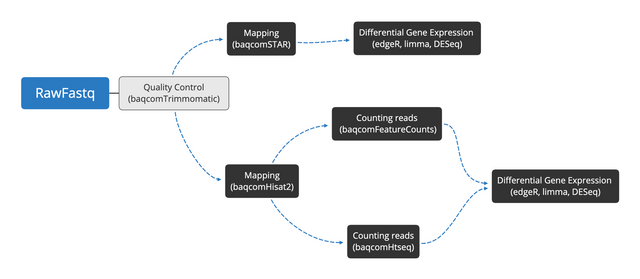


With a few set of command lines you can run multiple samples at once.

## Setting up the pipeline.



```
git clone https://github.com/hanielcedraz/BAQCOM.git
cd BAQCOM
chmod +x install.sh
./install.sh
```
## Quality Control
### baqcomTrimmomatic.R
```
baqcomTrimmomatic.R -p 36 -s 2 (paired-end)
baqcomTrimmomatic.R -p 36 -s 2 -z (single-end)
```
- -p option is the number of processors to use; 
- -s option is the number of samples to use at time
- -z option will run single end analysis
- More options can be accessed with -h option (baqcomTrimmomatic.R)

-------------------------------------------------------------------------
## Mapping
### baqcomSTAR.R

Running STAR \
Run Genome Index and Mapping \
```
baqcomSTAR.R -t /path/to/reference_genome.fa -g /path/to/reference_annotation.gtf -p 20 -q 3 (paired-end)
baqcomSTAR.R -t /path/to/reference_genome.fa -g /path/to/reference_annotation.gtf -p 20 -q 3 -z (single-end)
```
- -t option is the directory where the reference genome is stored (required); 
- -g option is the directory where the reference annotation is stored (optional but recomended); 
- -p option is the number of processors to use; 
- -q option is the number of samples to use at time;
- -z option will run single end analysis;
- More options can be accessed with -h option (baqcomSTAR.R -h)

### baqcomHisat2.R
Running HISAT2 
Run Genome Index and Mapping \
```
baqcomHisat2.R -t /path/to/reference_genome.fa -g /path/to/reference_annotation.gtf -p 20 -q 2 (paired-end)
baqcomHisat2.R -t /path/to/reference_genome.fa -g /path/to/reference_annotation.gtf -p 20 -q 2 -z (single-end)
```
- -t option is the directory where the reference genome is stored (required); 
- -g option is the directory where the reference annotation is stored (optional but recomended); 
- -p option is the number of processors to use;
- -q option is the number of samples to use at time;
- -z option will run single end analysis;
- More options can be accessed with -h option (baqcomHisat2.R -h)

-------------------------------------------------------------------------
## Counting Reads
### baqcomHtseq.R
Running HTseq-Counts
```
baqcomHtseq.R -g /path/to/reference_annotation.gtf -q 2 (paired-end)
baqcomHtseq.R -g /path/to/reference_annotation.gtf -q 2 -z (single-end)
```
- -g option is the directory where the reference annotation is stored (required);
- -q option is the number of samples to use at time;
- -z option will run single end analysis;
- More options can be accessed with -h option (baqcomHtseq.R -h)
	
### baqcomFeatureCounts.R
Running FeatureCounts
```
baqcomFeatureCounts.R -a /path/to/reference_annotation.gtf -p 20 -q 2 (paired-end)
baqcomFeatureCounts.R -a /path/to/reference_annotation.gtf -p 20 -q 2 -z (single-end)
```
- -a option is the directory where the reference annotation is stored (required);
- -p option is the number of processors to use;
- -q option is the number of samples to use at time;
- -z option will run single end analysis;
- More options can be accessed with -h option (baqcomFeatureCounts.R -h)

In [ ]:
%%bash
## Download BAQCOM from github
rm -rf BAQCOM
git clone https://github.com/hanielcedraz/BAQCOM.git

cd BAQCOM
# Seting up STAR
chmod +x bin/STAR_linux_2.7.6a
#rm -f STAR
ln -s bin/STAR_linux_2.7.6a STAR
echo -e "\nSTAR symbolic link created successfully"
mv baqcomSTAR.R baqcomSTAR
cat "baqcomSTAR" | sed "s|'STAR'|'./STAR'|" > baqcomSTAR.R

# Seting up HISAT2
wget https://cloud.biohpc.swmed.edu/index.php/s/hisat2-210-Linux_x86_64/download -q -O bin/hisat2-2.1.0-Linux_x86_64.zip
cd bin/
unzip -q hisat2-2.1.0-Linux_x86_64.zip
cd ..
ln -s bin/hisat2-2.1.0/hisat2 hisat2
ln -s bin/hisat2-2.1.0/hisat2-build hisat2-build
ln -s bin/hisat2-2.1.0/hisat2_extract_exons.py
ln -s bin/hisat2-2.1.0/hisat2_extract_splice_sites.py
mv baqcomHisat2.R baqcomHisat2
cat "baqcomHisat2" | sed "s|'hisat2'|'./hisat2'|" > baqcomHisat2.R
cat "baqcomHisat2.R" | sed "s|'hisat2-build'|'./hisat2-build'|" > baqcomHisat2
cat "baqcomHisat2" | sed "s|'hisat2_extract_exons.py'|'./hisat2_extract_exons.py'|" > baqcomHisat2.R
cat "baqcomHisat2.R" | sed "s|'hisat2_extract_splice_sites.py'|'./hisat2_extract_splice_sites.py'|" > baqcomHisat2
mv baqcomHisat2 baqcomHisat2.R


#Seting up feature Couts
wget https://downloads.sourceforge.net/project/subread/subread-2.0.0/subread-2.0.0-Linux-x86_64.tar.gz -q -O bin/subread-2.0.0-Linux-x86_64.tar.gz

cd bin/

tar xzf subread-2.0.0-Linux-x86_64.tar.gz
cd ../
ln -s bin/subread-2.0.0-Linux-x86_64/bin/featureCounts .
mv baqcomFeatureCounts.R baqcomFeatureCounts
cat "baqcomFeatureCounts" | sed "s|'featureCounts'|'./featureCounts'|" > baqcomFeatureCounts.R



#Seting up baqcomTrimmomatic
cat "baqcomTrimmomatic" | sed "s|XXX|$PWD|" > baqcomTrimmomatic.R
chmod +x baqcomTrimmomatic.R;
rm baqcomTrimmomatic

#giving executable permission to the pipelines and scripts
chmod +x baqcomFeatureCounts.R baqcomHisat2.R baqcomHtseq.R baqcomSTAR.R createSamples.sh runTest.sh countSTARreads.R

#install and configure fastQC
cd bin
unzip -q -u fastqc_v0.11.8.zip
mv -f fastqc_v0.11.8.zip .fastqc_v0.11.8.zip
rm -f fastqc
cd ../
ln -s bin/FastQC/fastqc .
chmod +x fastqc

#Install required R packages
chmod +x installPackages.R;
./installPackages.R;
mv installPackages.R .installPackages.R
ls -lh


#install MultiQC from PyPI using pip as follow:
#pip install multiqc

#install HTSeq-count using pip:
#pip install HTSeq


echo "done"

In [ ]:
%%bash
## You need a file containing the samples to be processed
## Run:
cd BAQCOM
mkdir 00-Fastq/
cp examples/HE* 00-Fastq/

#createSamples.sh -h # to see the options
./createSamples.sh

head samples.txt

echo "done"

In [ ]:
%%bash
## Running Quality Control
cd BAQCOM
./baqcomTrimmomatic.R -p 36 -s 2
echo "done"

In [ ]:
%%bash
## Looking at the results
cd BAQCOM
ls -lh 01-CleanedReads/
echo "done"


In [ ]:
%%bash
## Looking at the reports
cd BAQCOM
ls -lh 02-Reports/
echo "done"

In [256]:
%%bash
## Uncompressing genome files
cd BAQCOM
cd examples/genome/
gunzip Sus.Scrofa*
ls -lh
cd ../

echo "done"

total 34M
drwxr-xr-x 2 root root 4.0K Oct 20 03:16 index_HISAT2
-rw-r--r-- 1 root root 4.1M Oct 20 03:14 Sus.Scrofa.chr1.gene.annotation.gtf
-rw-r--r-- 1 root root  30M Oct 20 03:14 Sus.Scrofa.chr1.genome.dna.toplevel.fa
done


In [ ]:
%%bash
## Mapping
cd BAQCOM
# You ocan run STAR or Hisat2
# STAR aligns and count
# If you use Hisat2 you will need to run another step for counting


## STAR
./baqcomSTAR.R -t examples/genome/Sus.Scrofa.chr1.genome.dna.toplevel.fa.gz -g examples/genome/Sus.Scrofa.chr1.gene.annotation.gtf -p 20 -q 3

echo "done"


In [ ]:
%%bash
cd BAQCOM
## Looking at the mapping and count reads folder for STAR
ls -lh 02-MappedReadsSTAR/
ls -lh 04-GeneCountsSTAR/

echo "done"

In [ ]:
%%bash
cd BAQCOM
## Hisat2
./baqcomHisat2.R -t examples/genome/Sus.Scrofa.chr1.genome.dna.toplevel.fa -g examples/genome/Sus.Scrofa.chr1.gene.annotation.gtf -p 20 -q 2

echo "done"

In [258]:
%%bash
cd BAQCOM
## Looking at the mapping folder for HISAT2

ls -lh 02-MappedReadsHISAT2/

echo "done"

total 129M
-rw-r--r-- 1 root root 777 Oct 20 03:18 HE20-100K_summary.log
-rw-r--r-- 1 root root 65M Oct 20 03:18 HE20-100K_unsorted_sample.sam
-rw-r--r-- 1 root root 777 Oct 20 03:18 HE21-100K_summary.log
-rw-r--r-- 1 root root 65M Oct 20 03:18 HE21-100K_unsorted_sample.sam
done


In [ ]:
%%bash
cd BAQCOM
## Counting Reads

# HTSeq-Count
./baqcomHtseq.R -g examples/genome/Sus.Scrofa.chr1.gene.annotation.gtf -q 2

echo "done"


In [ ]:
%%bash
cd BAQCOM
## Looking at the count reads folder for HtSeqCount
echo -e "04-GeneCountsHTSeq\n"
ls -lh 04-GeneCountsHTSeq/



echo "done"

In [ ]:
%%bash
cd BAQCOM

# FeatureCounts
./baqcomFeatureCounts.R -a examples/genome/Sus.Scrofa.chr1.gene.annotation.gtf -T 10 -q 2
echo "done"

In [262]:
%%bash
cd BAQCOM
## Looking at the count reads folder for FeatureCounts

echo -e "04-GeneCountsHTSeq\n"
ls -slh 04-GeneCountsFeatCounts/

echo "done"

04-GeneCountsHTSeq

total 240K
8.0K -rw-r--r-- 1 root root 4.6K Oct 20 03:19 HE20-100KfeatCount.counts
108K -rw-r--r-- 1 root root 106K Oct 20 03:19 HE20-100KfeatCount.output
4.0K -rw-r--r-- 1 root root  406 Oct 20 03:19 HE20-100KfeatCount.output.summary
8.0K -rw-r--r-- 1 root root 4.6K Oct 20 03:19 HE21-100KfeatCount.counts
108K -rw-r--r-- 1 root root 106K Oct 20 03:19 HE21-100KfeatCount.output
4.0K -rw-r--r-- 1 root root  406 Oct 20 03:19 HE21-100KfeatCount.output.summary
done
